In [0]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# import data from Kaggle
# !wget -x --load-cookies cookies.txt "https://www.kaggle.com/c/3136/download-all" -O data.zip
# uploading zip in this case

# unzip data
!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [0]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

In [0]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# EDA

In [0]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [0]:
# Many columns have min zero that is not possible. (Glucose, BloodPressure, SkinThickness, Insulin, BMI)
# Replacing wrong values, i.e., zeros with NaN

In [0]:
# keeping a copy of the original data
diabetes_data_copy = diabetes_data.copy(deep = True)

In [0]:
# replacing zeros with NaN
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [0]:
# number of NaN in each column
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeac753208>,
      dtype=object)

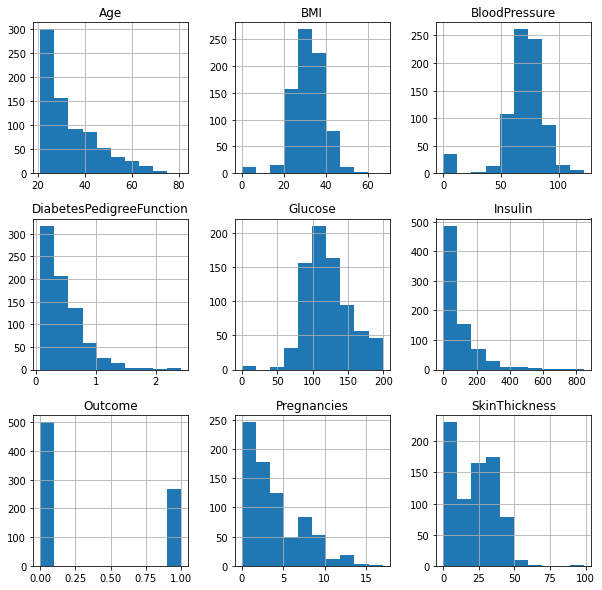

In [0]:
# histogram for original data
diabetes_data.hist(figsize = (10,10))

In [0]:
# replacing Glucose & BloodPressure with mean values
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)

# repalcing SkinThickness, Insulin & BMI with median values
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

# Why?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeac2d5748>,
      dtype=object)

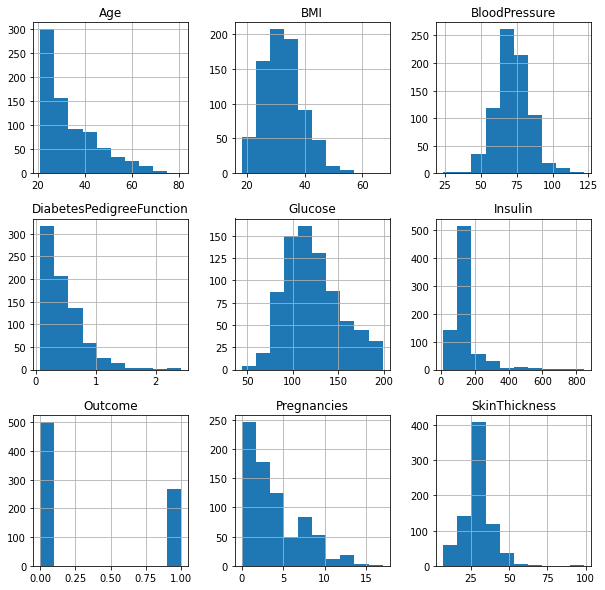

In [0]:
diabetes_data_copy.hist(figsize = (10,10))

In [0]:
diabetes_data.shape

(768, 9)

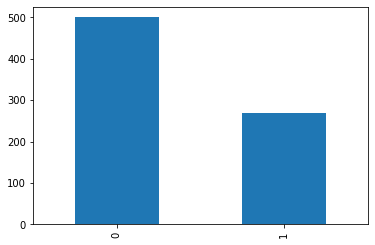

In [0]:
diabetes_data['Outcome'].value_counts().plot(kind="bar")

In [0]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(diabetes_data,figsize=(15, 15))

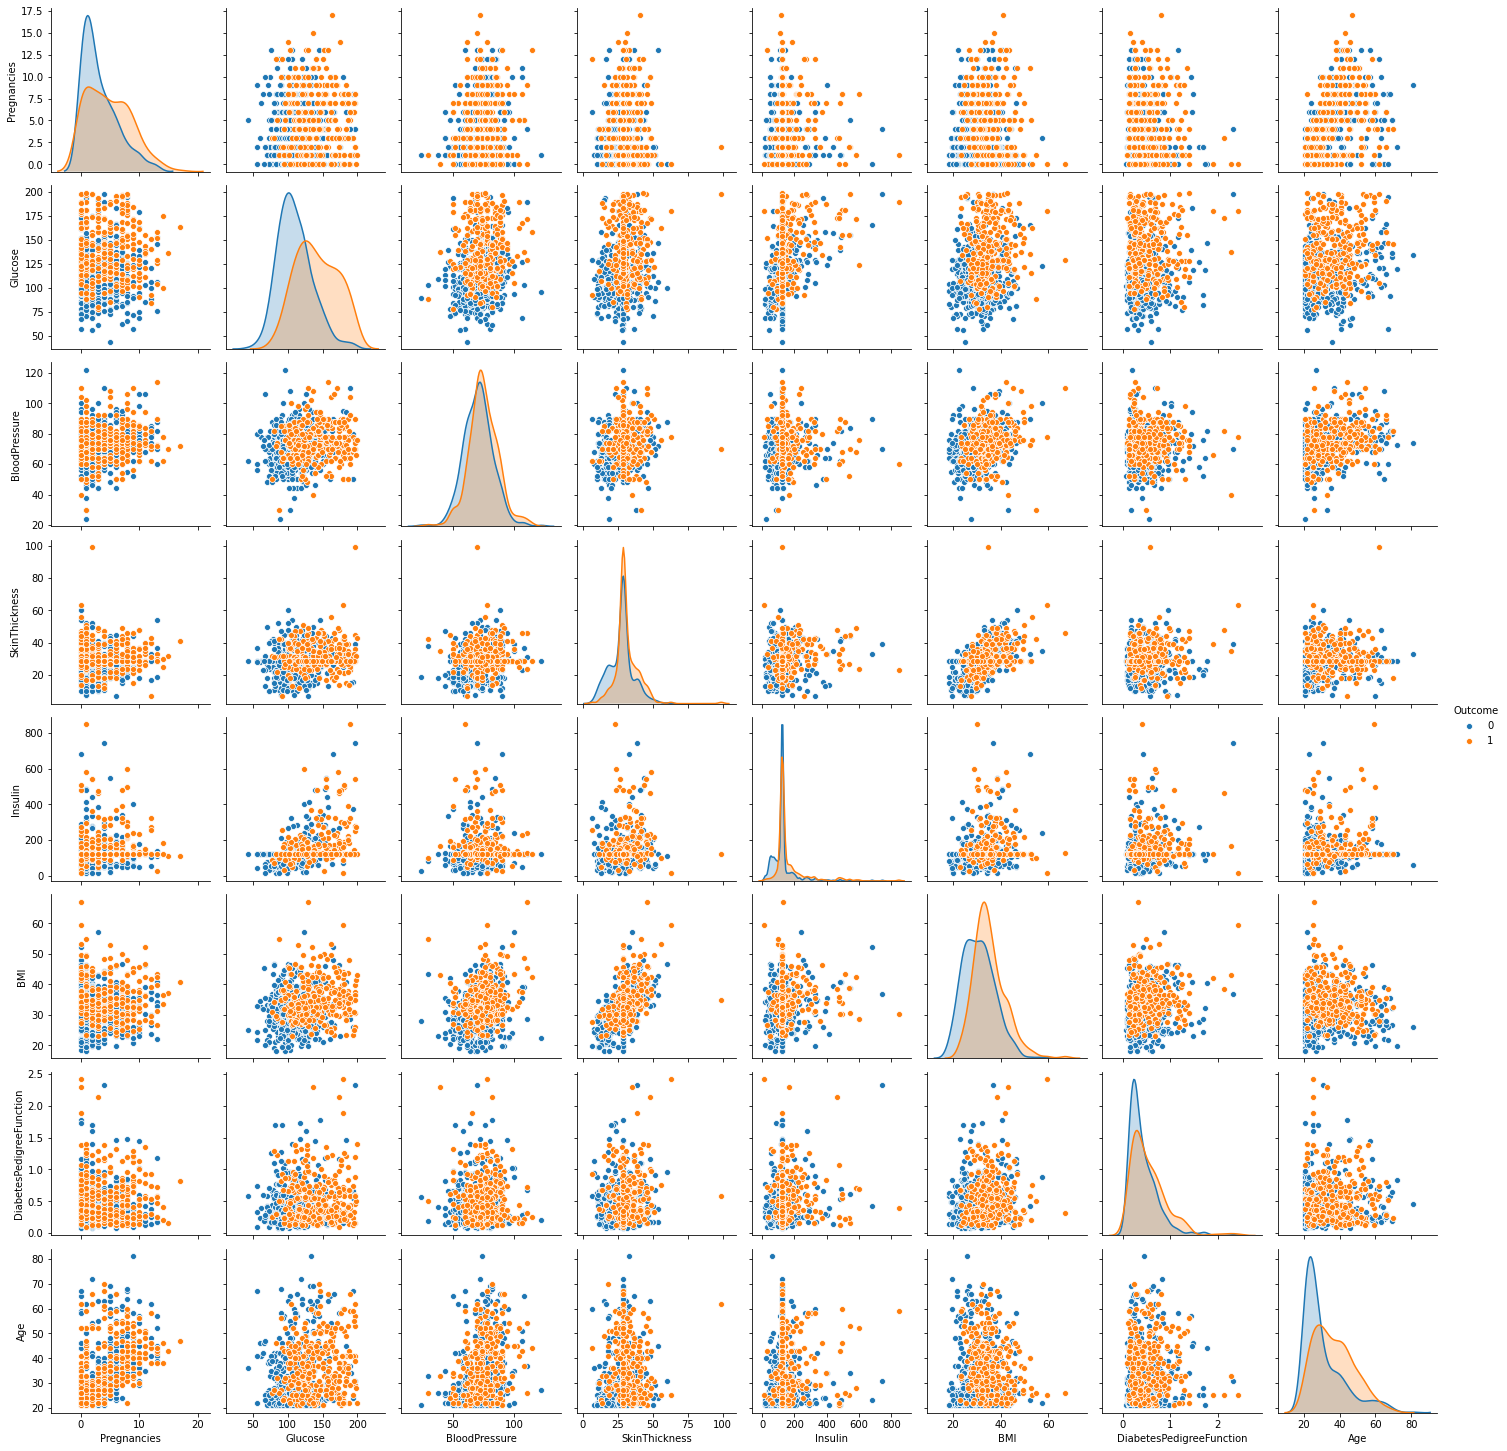

In [0]:
sns.pairplot(diabetes_data_copy, hue = 'Outcome')

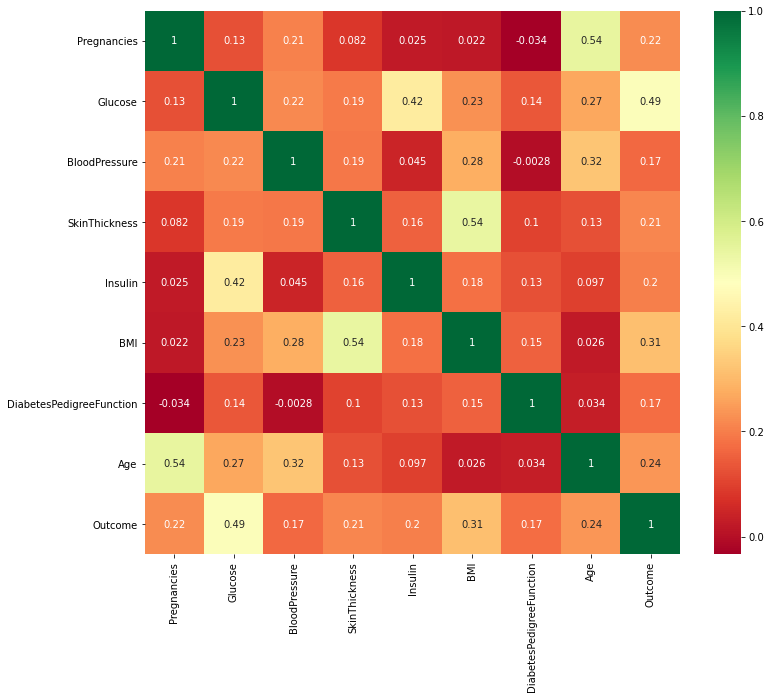

In [0]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')

In [0]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [0]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [0]:
y = diabetes_data_copy.Outcome

In [0]:
# train test split
# stratify will scale the split based on data ... like if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 
# 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [0]:
# finding the best K 
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

# running loop for values of k
for i in range(1,15):

    # applying KNN for k=i
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    # storing the KNN score for k=i in arrays
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [0]:
# finding value of k for which we got max score

# max train score
max_train_score = max(train_scores)
train_scores_ind = [k_value for k_value, score in enumerate(train_scores) if score == max_train_score]
#print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
print('Max train score is', train_scores[train_scores_ind[0]]*100, '% and it had K value =', train_scores_ind[0]+1)

# max test score
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
#print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
print('Max test score is', test_scores[test_scores_ind[0]]*100, '% and it had K value =', test_scores_ind[0]+1)

Max train score is 100.0 % and it had K value = 1
Max test score is 76.5625 % and it had K value = 11


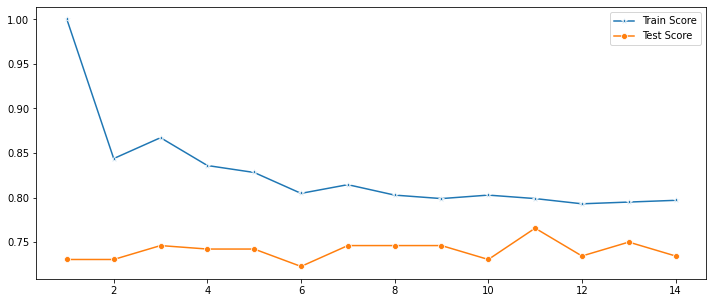

In [0]:
# Visualizing the K trend

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [0]:
# usung KNN with k=11

knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [0]:
# Confusion Matrix Analysis

from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 15.0, 'Predicted label')

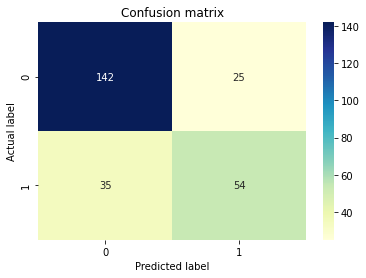

In [0]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')